# Q1) LeNet5 and AlexNet arch on Cats & Dogs 🐈🐕 and Horse2Zebra 🦓🐴Dataset

## Getting the Data Ready for Models 🤓

### Importing necessary libraries 🤔

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random as rand
from IPython.display import Image, display

# Neural Network
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers.legacy import Adam


from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Cats_and_Dogs_Dataset 🐈 🐕
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing 📊

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

#### Unzipping the files 🤐

In [ ]:
!unzip cats_and_dogs_filtered.zip

##### All images will be rescaled by 1./255 ⚖️

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
CnD_base_dir = '/content/drive/MyDrive/DL-Lab/cats_and_dogs_filtered'
CnD_train_dir = os.path.join(CnD_base_dir, 'train')
CnD_validation_dir = os.path.join(CnD_base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(CnD_train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(CnD_train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(CnD_validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(CnD_validation_dir, 'dogs')

##### Flow training images in batches of 20 using train_datagen generator 🏋🏻


In [5]:
train_generator = train_datagen.flow_from_directory(
        CnD_train_dir,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 224x224
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [6]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        CnD_validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


#### Getting to know the names of images of dogs and cats for labels 😼 🐶

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.100.jpg', 'cat.10.jpg', 'cat.0.jpg', 'cat.1.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


##### As we can see that they have prefix of either dog/cat and follow a specific naming we can extract the labels for each of them

##### Displaying an image

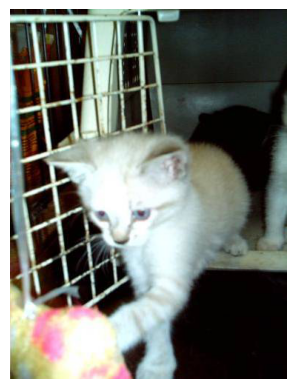

In [ ]:
num = rand.randint(1, 1000)
image_path = os.path.join(train_cats_dir, train_cat_fnames[num])
image = mpimg.imread(image_path)

im = mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[num]))

plt.imshow(image)
plt.axis('off')
plt.show()

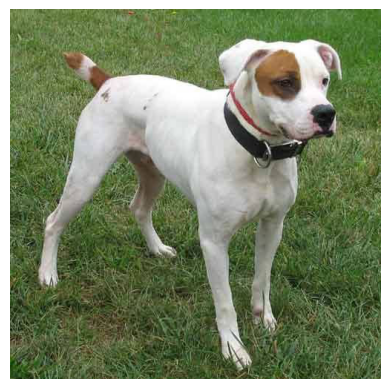

In [ ]:
num = rand.randint(1, 1000)
image_path = os.path.join(train_dogs_dir, train_dog_fnames[num])
image = mpimg.imread(image_path)

im = mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[num]))

plt.imshow(image)
plt.axis('off')
plt.show()

## Implementing Models now 🥸🤓

### LeNet5 - Cats & Dogs

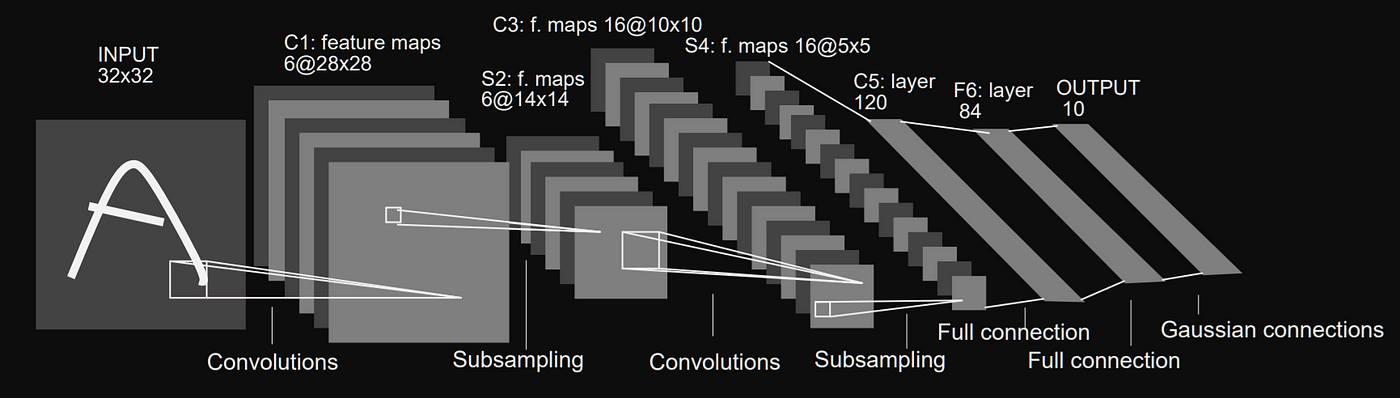

In [ ]:
image_path = 'LeNet5.png'
display(Image(filename=image_path))

#### Building the model

In [ ]:
# Define the LeNet-5 model
lenetcatDog = tf.keras.Sequential([
    Conv2D(6, (5, 5), activation='relu', padding='same',input_shape=(32, 32, 3)),
    AveragePooling2D(strides=2),
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    AveragePooling2D(strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
custom_optimizer = Adam(learning_rate=0.001)
lenetcatDog.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
lenetcatDog.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_10 (Aver  (None, 16, 16, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_36 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_11 (Aver  (None, 6, 6, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_10 (Flatten)        (None, 576)               0         
                                                                 
 dense_30 (Dense)            (None, 120)             

#### Running epochs 🏃🏻🏃🏻

In [ ]:
historyLenetCatDog = lenetcatDog.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/5
100/100 [==============================] - 4s 35ms/step - loss: 0.6931 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5720
Epoch 2/5
100/100 [==============================] - 3s 29ms/step - loss: 0.6850 - accuracy: 0.5695 - val_loss: 0.6872 - val_accuracy: 0.5250
Epoch 3/5
100/100 [==============================] - 3s 29ms/step - loss: 0.6702 - accuracy: 0.5890 - val_loss: 0.6917 - val_accuracy: 0.5410
Epoch 4/5
100/100 [==============================] - 3s 29ms/step - loss: 0.6597 - accuracy: 0.5965 - val_loss: 0.6694 - val_accuracy: 0.5930
Epoch 5/5
100/100 [==============================] - 3s 29ms/step - loss: 0.6370 - accuracy: 0.6300 - val_loss: 0.6608 - val_accuracy: 0.6230


#### Observing Loss and Accuracy Graphs📈📉

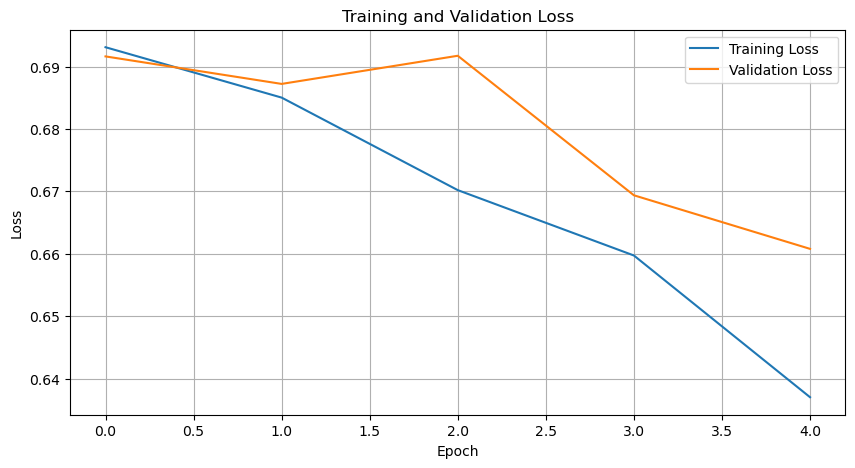

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyLenetCatDog.history['loss'], label='Training Loss')
plt.plot(historyLenetCatDog.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

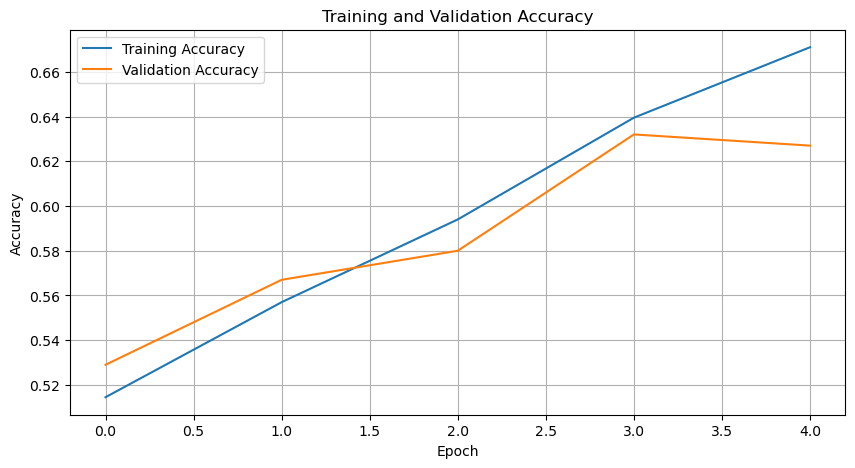

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Model Building

### AlexNet - Cats & Dogs

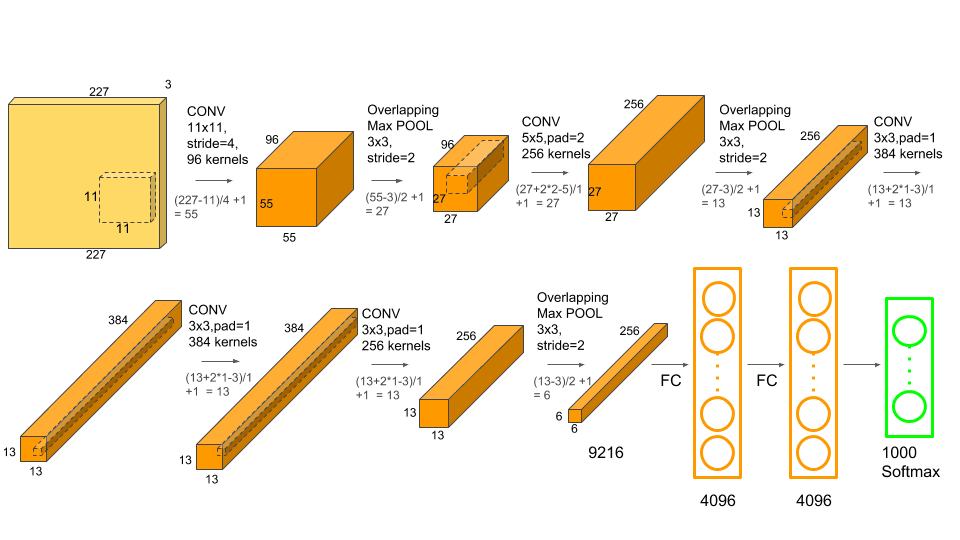

In [ ]:
image_path = 'AlexNet.png'
display(Image(filename=image_path))

#### Resizing the images as per AlexNet 📏

In [ ]:
train_generator_alex = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator_alex = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


#### Model Building ⚒️

In [ ]:
# Define the AlexNet model
alexcatDog = tf.keras.Sequential([
    # First Convolutional Layer
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Second Convolutional Layer
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Third Convolutional Layer
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # Fourth Convolutional Layer
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # Fifth Convolutional Layer
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Flatten the output for fully connected layers
    Flatten(),

    # First Fully Connected Layer
    Dense(4096, activation='relu'),

    # Second Fully Connected Layer
    Dense(4096, activation='relu'),

    # Output Layer
    Dense(1, activation='softmax')
])

In [ ]:
# custom_optimizer = Adam(learning_rate=0.001)
alexcatDog.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
alexcatDog.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

#### Running Epochs 🏃🏻🏃🏻

In [ ]:
 historyAlexCatDog = alexcatDog.fit(
    train_generator_alex,
#     steps_per_epoch=len(train_generator_alex),
    epochs=5,
    validation_data=validation_generator_alex,
#     validation_steps=len(validation_generator_alex)
)

Epoch 1/5
100/100 [==============================] - 163s 2s/step - loss: 0.9199 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 163s 2s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
100/100 [==============================] - 183s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
100/100 [==============================] - 182s 2s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 188s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


#### Plotting Loss and Accuracy Curves 📈📉

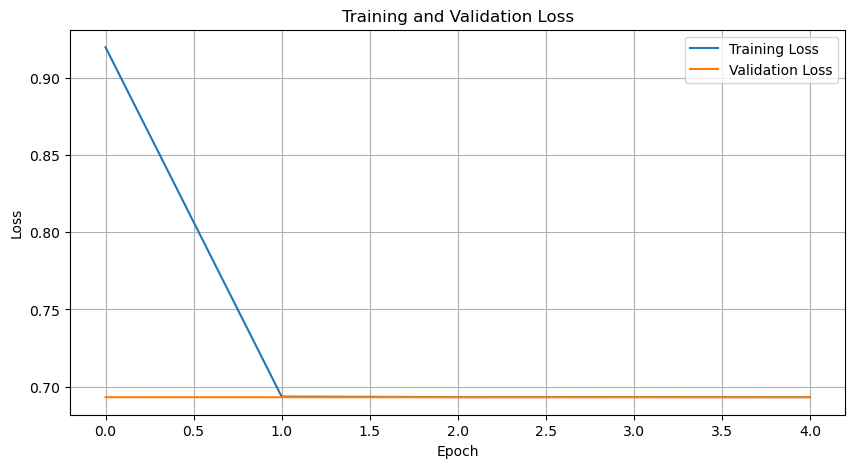

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyAlexCatDog.history['loss'], label='Training Loss')
plt.plot(historyAlexCatDog.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

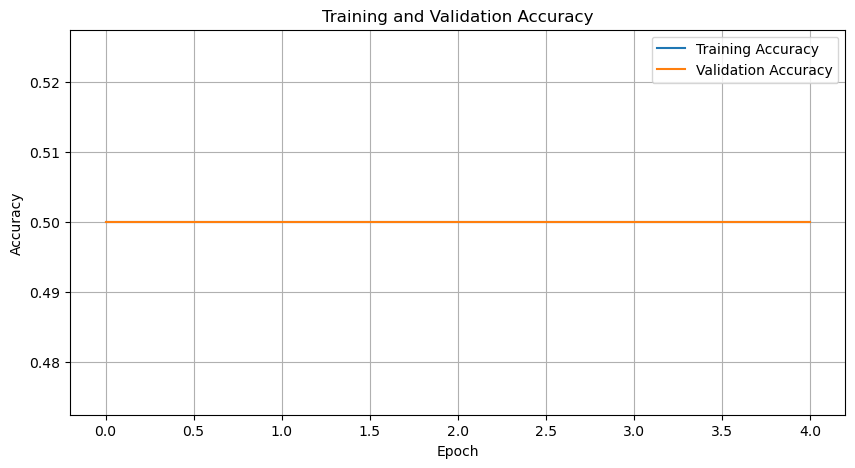

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyAlexCatDog.history['accuracy'], label='Training Accuracy')
plt.plot(historyAlexCatDog.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Horse2Zebra Dataset 🦓🐴

#### Importing
https://www.kaggle.com/datasets/balraj98/#

#### Unzipping

In [ ]:
!unzip archive

##### All images will be rescaled by 1./255

In [8]:
train_datagen_h2z = ImageDataGenerator(rescale=1./255)
test_datagen_h2z = ImageDataGenerator(rescale=1./255)

#### Getting the path of test & train images

In [9]:
H2Z_base_dir = '/content/drive/MyDrive/DL-Lab/archive'
H2Z_train_dir = os.path.join(H2Z_base_dir, 'train')
H2Z_test_dir = os.path.join(H2Z_base_dir, 'test')

# Directory with our training cat pictures
train_horse_dir = os.path.join(H2Z_train_dir, 'trainA')

# Directory with our training dog pictures
train_zebra_dir = os.path.join(H2Z_train_dir, 'trainB')

# Directory with our validation cat pictures
test_horse_dir = os.path.join(H2Z_test_dir, 'testA')

# Directory with our validation dog pictures
test_zebra_dir = os.path.join(H2Z_test_dir, 'testB')

#### Resizing the images as per LeNet5 🛜

In [10]:
train_generator_h2z_lenet = train_datagen_h2z.flow_from_directory(
        H2Z_train_dir,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 224x224
        batch_size=20,
        class_mode='binary')

Found 2453 images belonging to 2 classes.


In [11]:
# Flow validation images in batches of 20 using val_datagen generator
test_generator_h2z_lenet = test_datagen_h2z.flow_from_directory(
        H2Z_test_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='binary')

Found 260 images belonging to 2 classes.


#### File names

In [12]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])

['n02381460_1524.jpg', 'n02381460_3577.jpg', 'n02381460_1816.jpg', 'n02381460_178.jpg', 'n02381460_4541.jpg', 'n02381460_2371.jpg', 'n02381460_1101.jpg', 'n02381460_4465.jpg', 'n02381460_1075.jpg', 'n02381460_1579.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004 (1).jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg']


##### Horse Image 🐴

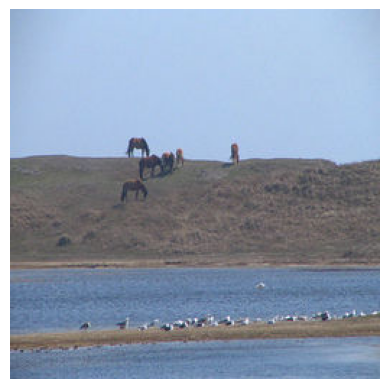

In [13]:
num = rand.randint(1, 1000)
image_path = os.path.join(train_horse_dir, train_horse_fnames[num])
image = mpimg.imread(image_path)

im = mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[num]))

plt.imshow(image)
plt.axis('off')
plt.show()

##### Zebra Image 🦓

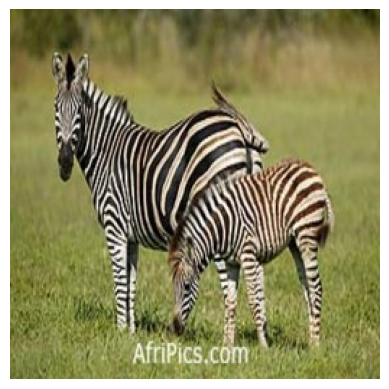

In [14]:
num = rand.randint(1, 1000)
image_path = os.path.join(train_zebra_dir, train_zebra_fnames[num])
image = mpimg.imread(image_path)

im = mpimg.imread(os.path.join(train_zebra_dir, train_zebra_fnames[num]))

plt.imshow(image)
plt.axis('off')
plt.show()

## Implementing Models now

### LeNet5 - H2Z

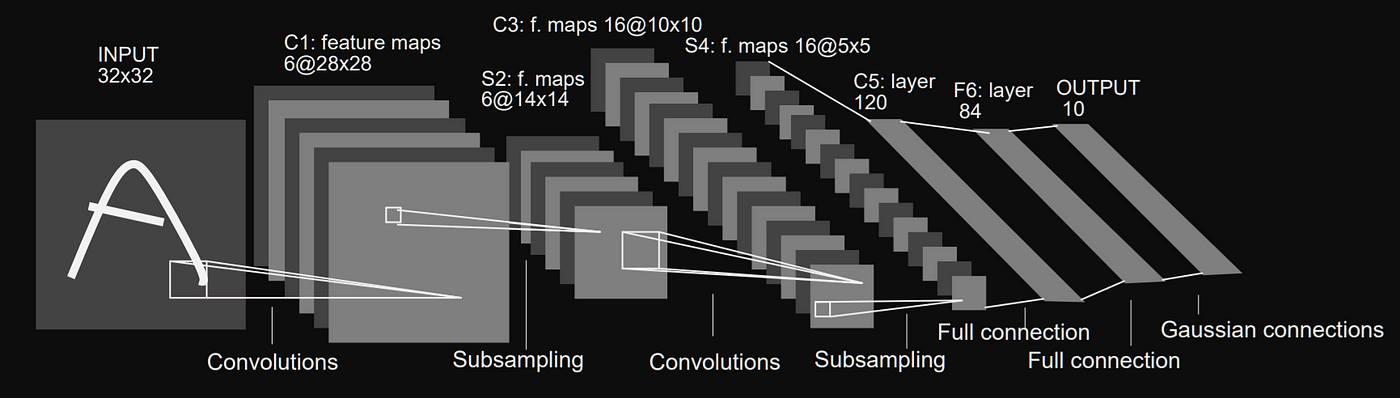

In [ ]:
image_path = 'LeNet5.png'
display(Image(filename=image_path))

#### Bulding the model 🛜⚒️

In [ ]:
# Define the LeNet-5 model
leneth2z = tf.keras.Sequential([
    Conv2D(6, (5, 5), activation='relu', padding='same',input_shape=(32, 32, 3)),
    AveragePooling2D(strides=2),
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    AveragePooling2D(strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
custom_optimizer = Adam(learning_rate=0.001)
leneth2z.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
leneth2z.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_4 (Avera  (None, 16, 16, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

#### Running the Epochs 🏃🏻🏃🏻

In [ ]:
historyleneth2z = leneth2z.fit(
    train_generator_h2z,
    steps_per_epoch=len(train_generator_h2z_lenet),
    epochs=10,
    validation_data=test_generator_h2z_lenet,
    validation_steps=len(test_generator_h2z_lenet)
)

Epoch 1/10
121/121 [==============================] - 5s 36ms/step - loss: 0.5884 - accuracy: 0.6710 - val_loss: 0.4282 - val_accuracy: 0.7808
Epoch 2/10
121/121 [==============================] - 4s 29ms/step - loss: 0.4330 - accuracy: 0.8005 - val_loss: 0.4223 - val_accuracy: 0.7923
Epoch 3/10
121/121 [==============================] - 4s 30ms/step - loss: 0.3933 - accuracy: 0.8197 - val_loss: 0.3342 - val_accuracy: 0.8462
Epoch 4/10
121/121 [==============================] - 4s 29ms/step - loss: 0.3744 - accuracy: 0.8355 - val_loss: 0.3331 - val_accuracy: 0.8538
Epoch 5/10
121/121 [==============================] - 4s 29ms/step - loss: 0.3431 - accuracy: 0.8551 - val_loss: 0.3523 - val_accuracy: 0.8346
Epoch 6/10
121/121 [==============================] - 4s 29ms/step - loss: 0.3275 - accuracy: 0.8551 - val_loss: 0.2834 - val_accuracy: 0.8846
Epoch 7/10
121/121 [==============================] - 4s 29ms/step - loss: 0.3093 - accuracy: 0.8626 - val_loss: 0.2733 - val_accuracy: 0.8769

#### Plotting the Loss and Accuracy Curves 📉📈

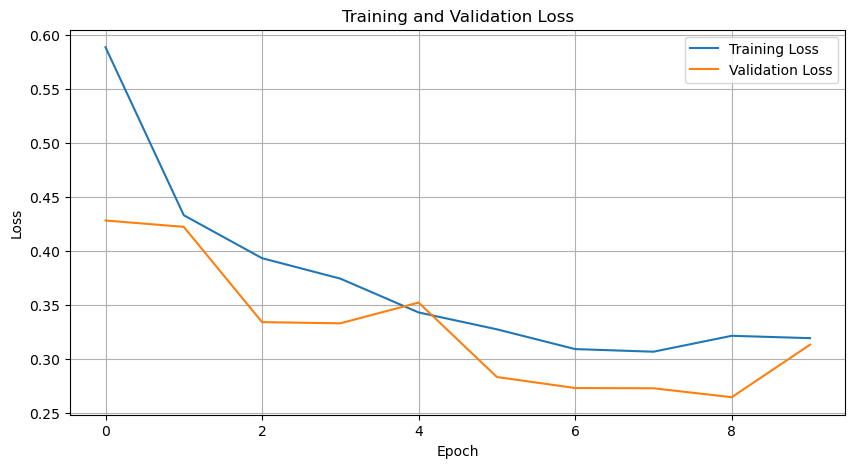

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyleneth2z.history['loss'], label='Training Loss')
plt.plot(historyleneth2z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

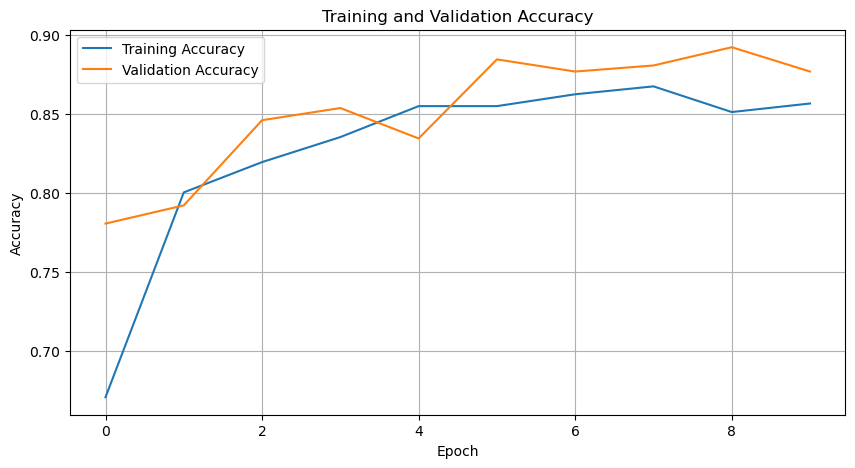

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyleneth2z.history['accuracy'], label='Training Accuracy')
plt.plot(historyleneth2z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### AlexNet - H2Z

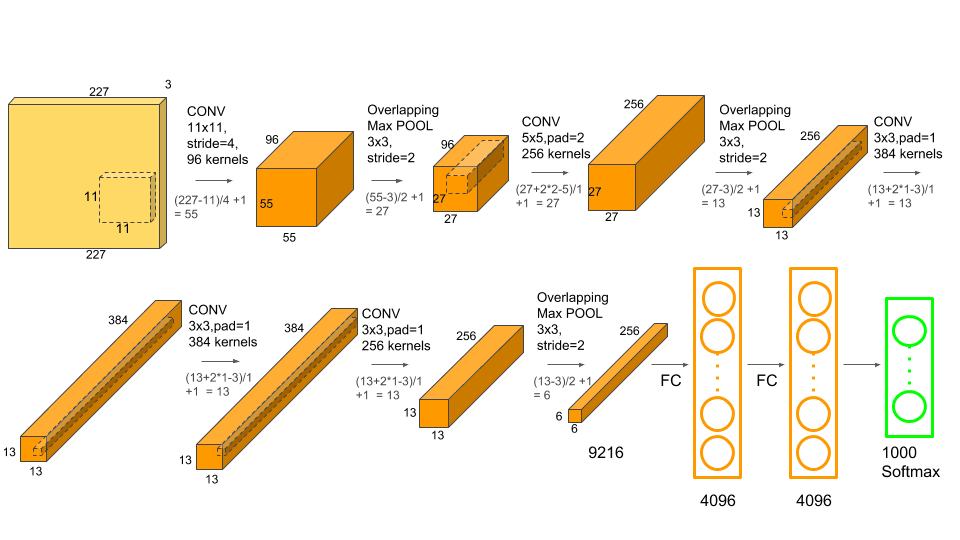

In [ ]:
image_path = 'AlexNet.png'
display(Image(filename=image_path))

#### Resizing the images as per AlexNet 🦁

In [ ]:
train_generator_h2z_alex = train_datagen_h2z.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        class_mode='binary')

Found 2401 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
test_generator_h2z_alex = test_datagen_h2z.flow_from_directory(
        test_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

Found 260 images belonging to 2 classes.


#### Building the model ⚒️

In [ ]:
# Define the AlexNet model
alexh2z = tf.keras.Sequential([
    # First Convolutional Layer
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Second Convolutional Layer
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Third Convolutional Layer
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # Fourth Convolutional Layer
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # Fifth Convolutional Layer
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Flatten the output for fully connected layers
    Flatten(),

    # First Fully Connected Layer
    Dense(4096, activation='relu'),

    # Second Fully Connected Layer
    Dense(4096, activation='relu'),

    # Output Layer
    Dense(1, activation='softmax')
])

In [ ]:
# custom_optimizer = Adam(learning_rate=0.001)
alexh2z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
alexh2z.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 384)      

#### Running Epochs 🤓🏃🏻

In [ ]:
 historyAlexh2z = alexh2z.fit(
    train_generator_h2z_alex,
#     steps_per_epoch=len(train_generator_alex),
    epochs=5,
    validation_data=test_generator_h2z_alex,
#     validation_steps=len(validation_generator_alex)
)

Epoch 1/5
121/121 [==============================] - 163s 1s/step - loss: 0.6890 - accuracy: 0.5556 - val_loss: 0.6906 - val_accuracy: 0.5385
Epoch 2/5
121/121 [==============================] - 176s 1s/step - loss: 0.6881 - accuracy: 0.5556 - val_loss: 0.6902 - val_accuracy: 0.5385
Epoch 3/5
121/121 [==============================] - 184s 2s/step - loss: 0.6882 - accuracy: 0.5556 - val_loss: 0.6902 - val_accuracy: 0.5385
Epoch 4/5
121/121 [==============================] - 187s 2s/step - loss: 0.6877 - accuracy: 0.5556 - val_loss: 0.6910 - val_accuracy: 0.5385
Epoch 5/5
121/121 [==============================] - 182s 2s/step - loss: 0.6874 - accuracy: 0.5556 - val_loss: 0.6909 - val_accuracy: 0.5385


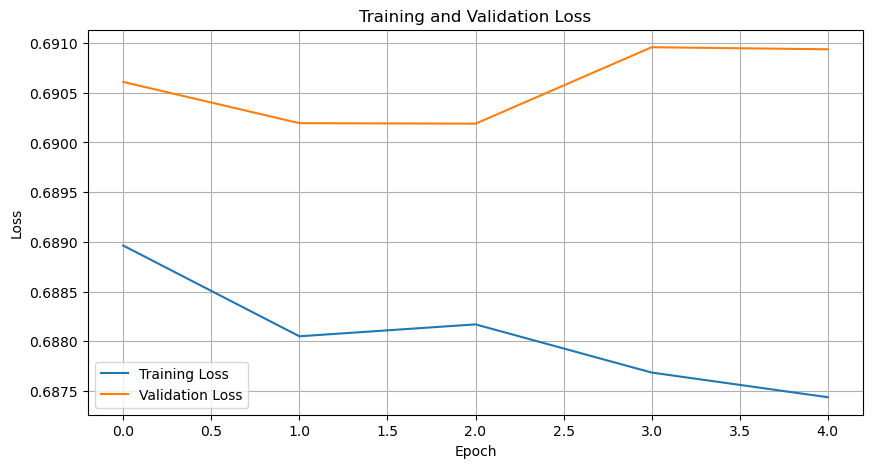

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyAlexh2z.history['loss'], label='Training Loss')
plt.plot(historyAlexh2z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

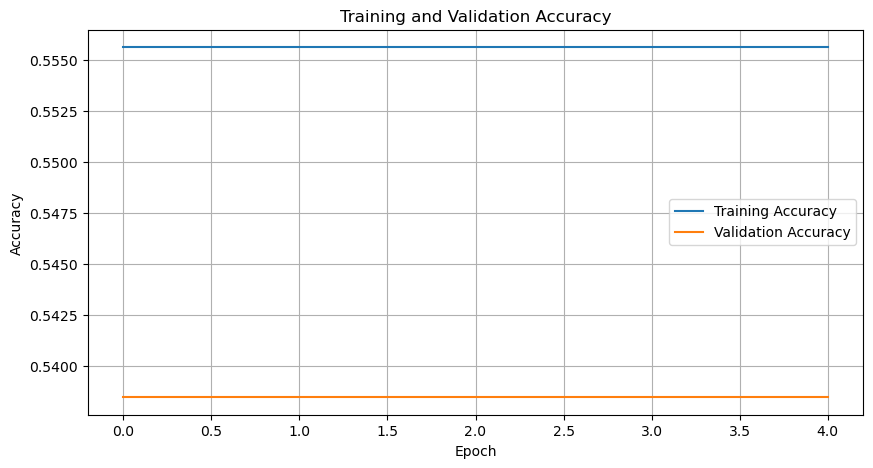

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyAlexh2z.history['accuracy'], label='Training Accuracy')
plt.plot(historyAlexh2z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# LeNet5 performs wayy better that AlexNet
AlexNet took way more time than LeNet

AlexNet had problem converging

Accuracy of AlexNet was 0.55

Accuracy of LeNet was 0.85 for H2z and 0.7 for Cats&Dogs


# Q2) Implemeting other Models like
### A) VGG-16

#### Cats & Dogs

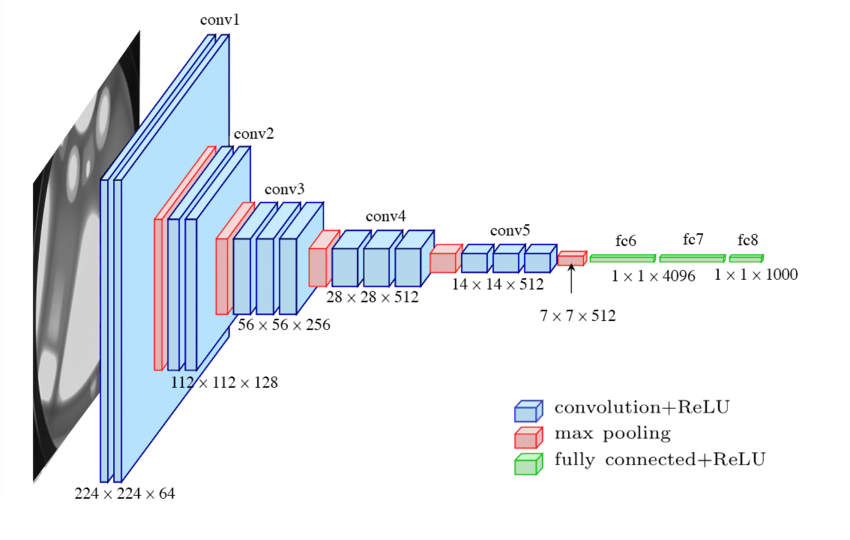

In [ ]:
image_path = 'vgg16.png'
display(Image(filename=image_path))

In [21]:
train_generator_vgg_CnD = train_datagen.flow_from_directory(
        CnD_train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator_vgg_CnD = val_datagen.flow_from_directory(
        CnD_validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

vggCnD = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

vggCnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

vggCnD.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
vggCnD.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history_vggCnD = vggCnD.fit(
    train_generator_vgg_CnD,
    epochs=10,
    validation_data=validation_generator_vgg_CnD
)

Epoch 1/20
100/100 [==============================] - 18s 169ms/step - loss: 0.1999 - accuracy: 0.9425 - val_loss: 0.2471 - val_accuracy: 0.9040
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.1805 - accuracy: 0.9445 - val_loss: 0.2337 - val_accuracy: 0.9060
Epoch 3/20
100/100 [==============================] - 21s 210ms/step - loss: 0.1560 - accuracy: 0.9605 - val_loss: 0.2273 - val_accuracy: 0.9100
Epoch 4/20
100/100 [==============================] - 16s 157ms/step - loss: 0.1439 - accuracy: 0.9615 - val_loss: 0.2215 - val_accuracy: 0.9070
Epoch 5/20
100/100 [==============================] - 16s 164ms/step - loss: 0.1301 - accuracy: 0.9655 - val_loss: 0.2188 - val_accuracy: 0.9110
Epoch 6/20
100/100 [==============================] - 16s 163ms/step - loss: 0.1195 - accuracy: 0.9735 - val_loss: 0.2151 - val_accuracy: 0.9110
Epoch 7/20
100/100 [==============================] - 16s 158ms/step - loss: 0.1112 - accuracy: 0.9770 - val_loss: 0.2123 - val_ac

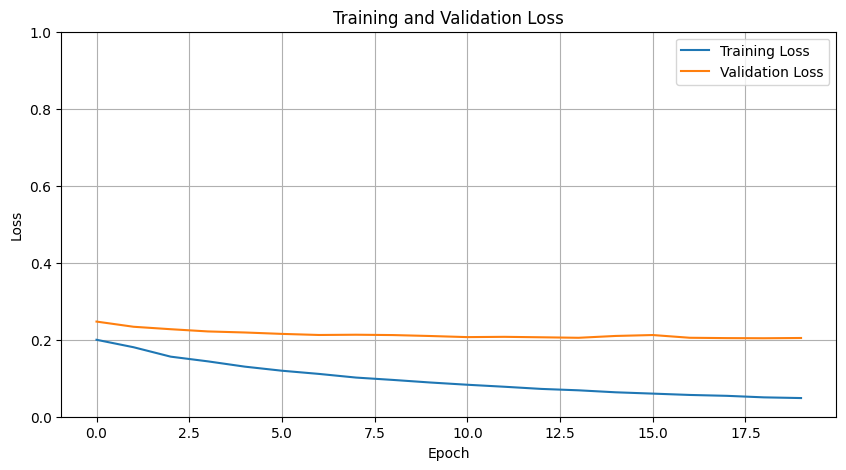

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(history_vggCnD.history['loss'], label='Training Loss')
plt.plot(history_vggCnD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)

plt.grid()
plt.show()

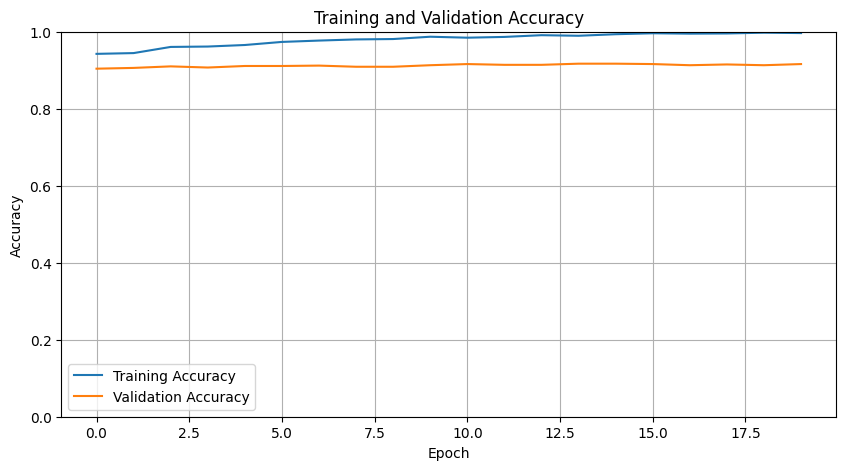

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(history_vggCnD.history['accuracy'], label='Training Accuracy')
plt.plot(history_vggCnD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

#### Horse2Zebra

In [25]:
train_generator_vgg_H2Z = train_datagen.flow_from_directory(
        H2Z_train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator_vgg_H2Z = val_datagen.flow_from_directory(
        H2Z_test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2453 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [31]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

vggH2Z = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])


vggH2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

vggH2Z.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
vggH2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_vggH2Z = vggH2Z.fit(
    train_generator_vgg_H2Z,
    epochs=5,
    validation_data=validation_generator_vgg_H2Z
)

Epoch 1/5
123/123 [==============================] - 16s 121ms/step - loss: 0.1849 - accuracy: 0.9168 - val_loss: 0.0990 - val_accuracy: 0.9692
Epoch 2/5
123/123 [==============================] - 16s 126ms/step - loss: 0.0717 - accuracy: 0.9812 - val_loss: 0.1056 - val_accuracy: 0.9500
Epoch 3/5
123/123 [==============================] - 15s 121ms/step - loss: 0.0465 - accuracy: 0.9837 - val_loss: 0.0766 - val_accuracy: 0.9654
Epoch 4/5
123/123 [==============================] - 15s 119ms/step - loss: 0.0276 - accuracy: 0.9955 - val_loss: 0.0884 - val_accuracy: 0.9577
Epoch 5/5
123/123 [==============================] - 16s 126ms/step - loss: 0.0201 - accuracy: 0.9984 - val_loss: 0.0689 - val_accuracy: 0.9731


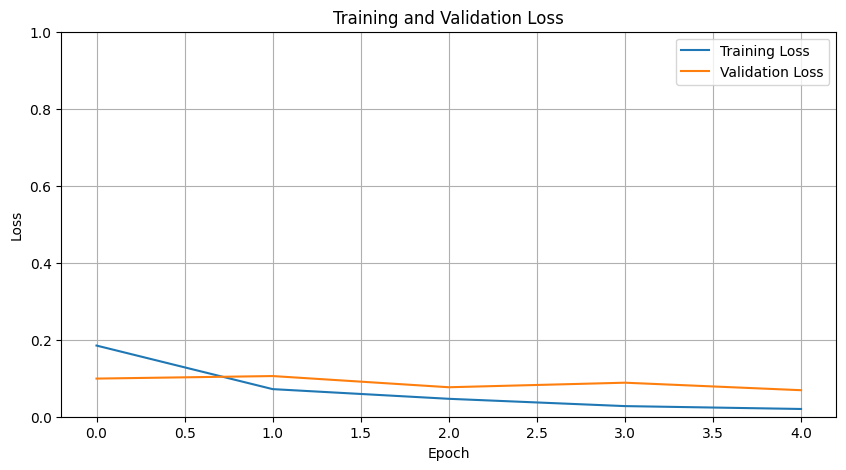

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(history_vggH2Z.history['loss'], label='Training Loss')
plt.plot(history_vggH2Z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)

plt.grid()
plt.show()

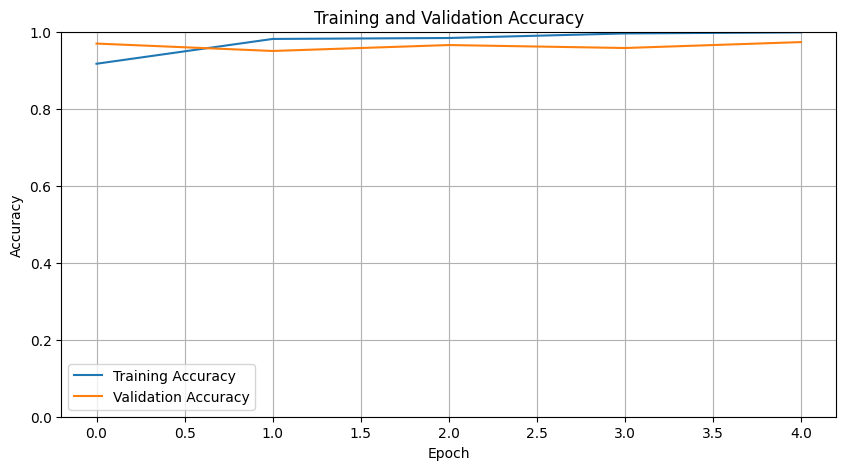

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(history_vggH2Z.history['accuracy'], label='Training Accuracy')
plt.plot(history_vggH2Z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

## GoogleNet- Inception Module

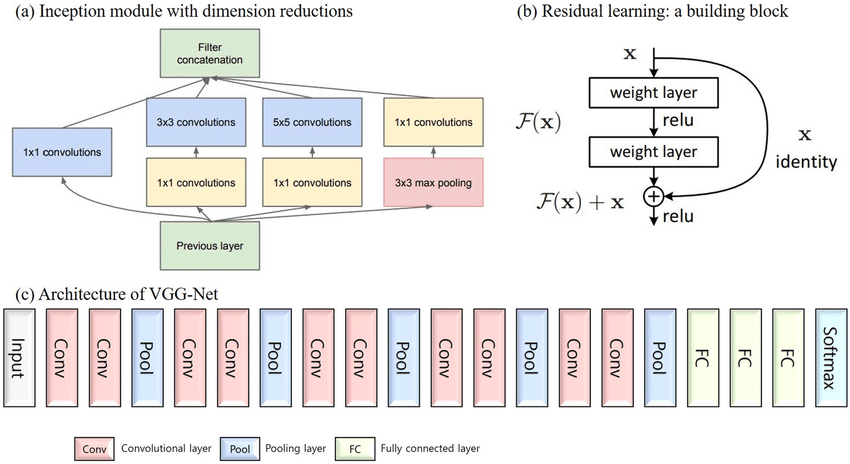

In [73]:
image_path = 'googleNet.png'
display(Image(filename=image_path))

#### Cats & Dogs

In [34]:
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 (GoogleNet) model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a Sequential model with custom layers for binary classification
inceptionCnD = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
inceptionCnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
inceptionCnD.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51201     
                                                                 
Total params: 21,853,985
Trainable params: 51,201
Non-trainable params: 21,802,784
_________________________________________________________________


In [35]:
inceptionCnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_inceptionCnD = inceptionCnD.fit(
    train_generator_vgg_CnD,
    batch_size=32,
    epochs=5,
    validation_data=validation_generator_vgg_CnD
)

Epoch 1/5
100/100 [==============================] - 19s 127ms/step - loss: 0.2161 - accuracy: 0.9635 - val_loss: 0.0901 - val_accuracy: 0.9840
Epoch 2/5
100/100 [==============================] - 11s 114ms/step - loss: 0.0890 - accuracy: 0.9870 - val_loss: 0.1900 - val_accuracy: 0.9850
Epoch 3/5
100/100 [==============================] - 13s 126ms/step - loss: 0.0288 - accuracy: 0.9950 - val_loss: 0.3406 - val_accuracy: 0.9750
Epoch 4/5
100/100 [==============================] - 12s 116ms/step - loss: 0.0207 - accuracy: 0.9960 - val_loss: 0.1968 - val_accuracy: 0.9830
Epoch 5/5
100/100 [==============================] - 12s 116ms/step - loss: 1.7475e-04 - accuracy: 1.0000 - val_loss: 0.2020 - val_accuracy: 0.9830


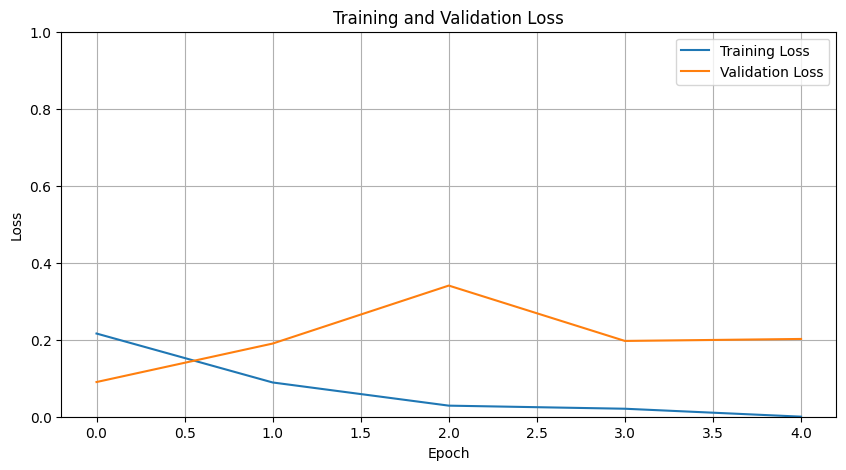

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(history_inceptionCnD.history['loss'], label='Training Loss')
plt.plot(history_inceptionCnD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)

plt.grid()
plt.show()

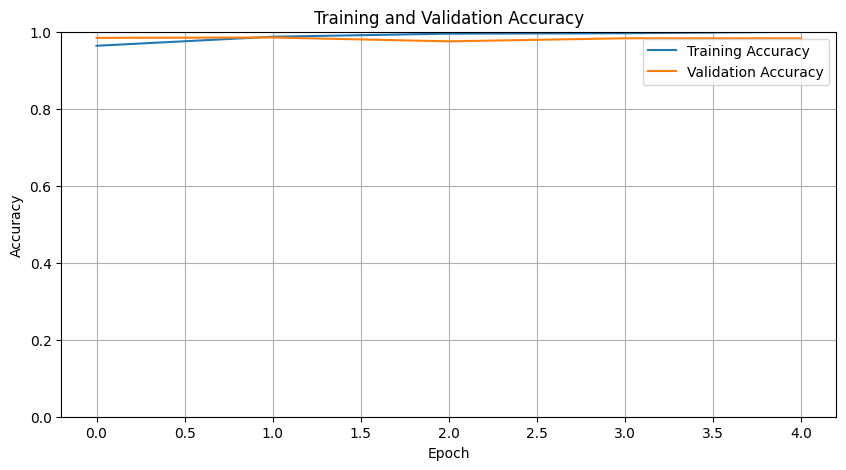

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(history_inceptionCnD.history['accuracy'], label='Training Accuracy')
plt.plot(history_inceptionCnD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

#### Horse2Zebra

In [36]:
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 (GoogleNet) model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Create a Sequential model with custom layers for binary classification
inceptionH2Z = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
inceptionH2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
inceptionH2Z.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_9 (Flatten)         (None, 51200)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51201     
                                                                 
Total params: 21,853,985
Trainable params: 51,201
Non-trainable params: 21,802,784
_________________________________________________________________


In [38]:
inceptionH2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_inceptionH2Z = inceptionH2Z.fit(
    train_generator_vgg_H2Z,
    epochs=2,
    validation_data=validation_generator_vgg_H2Z
)

Epoch 1/2
123/123 [==============================] - 17s 102ms/step - loss: 0.0860 - accuracy: 0.9931 - val_loss: 0.5160 - val_accuracy: 0.9692
Epoch 2/2
123/123 [==============================] - 11s 87ms/step - loss: 0.0206 - accuracy: 0.9976 - val_loss: 0.4405 - val_accuracy: 0.9808


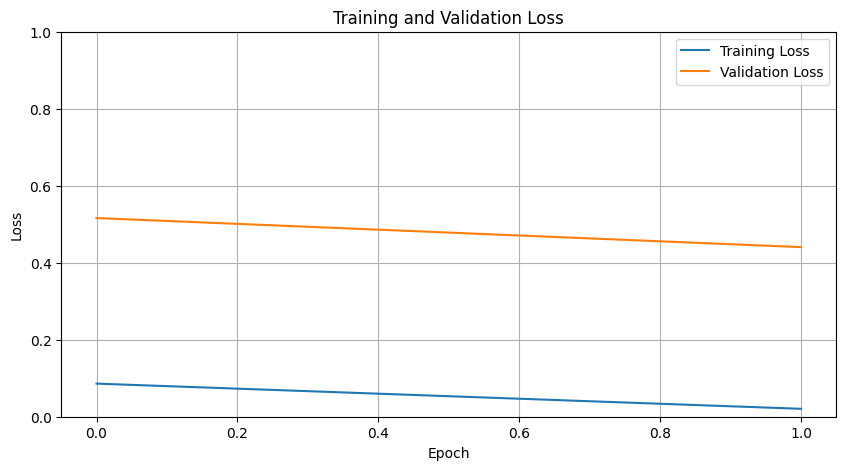

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(history_inceptionH2Z.history['loss'], label='Training Loss')
plt.plot(history_inceptionH2Z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

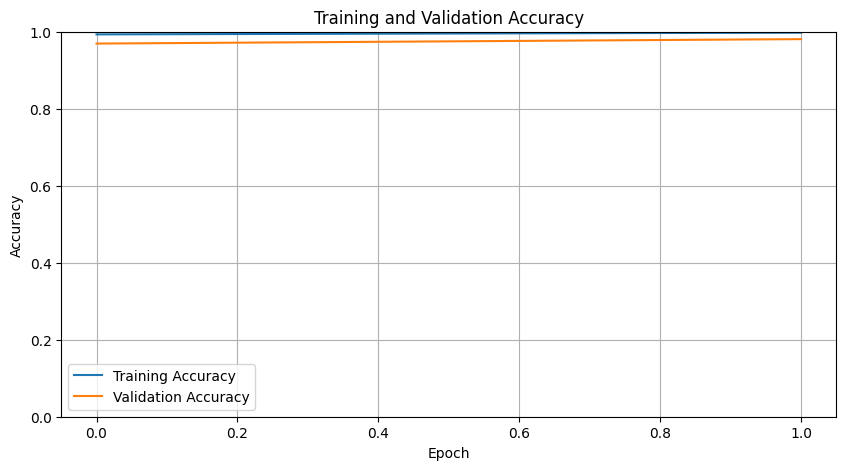

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(history_inceptionH2Z.history['accuracy'], label='Training Accuracy')
plt.plot(history_inceptionH2Z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

## ResNet50

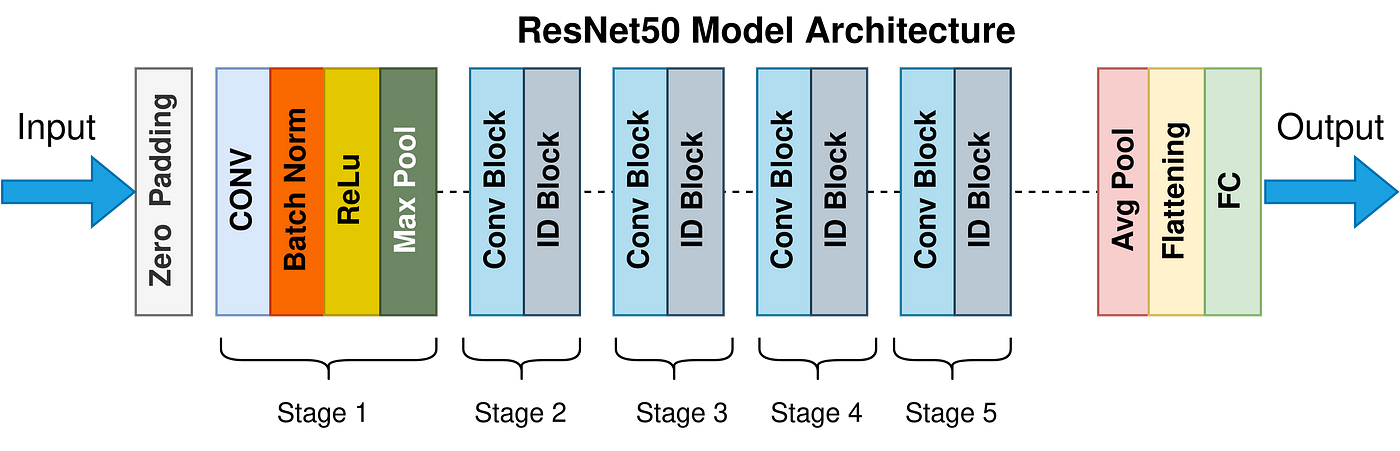

In [74]:
image_path = 'resNet50.png'
display(Image(filename=image_path))

#### Cats & Dogs

In [49]:
from tensorflow.keras.applications import ResNet50

In [60]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False

# Create a Sequential model with custom layers for binary classification
resnetCnD = tf.keras.Sequential([
    base_model_resnet,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
resnetCnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
resnetCnD.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_13 (Flatten)        (None, 100352)            0         
                                                                 
 dense_13 (Dense)            (None, 1)                 100353    
                                                                 
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


In [61]:
resnetCnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_resnetCnD = resnetCnD.fit(
    train_generator_vgg_CnD,
    epochs=10,
    validation_data=validation_generator_vgg_CnD
)

Epoch 1/10
100/100 [==============================] - 22s 134ms/step - loss: 1.0061 - accuracy: 0.5765 - val_loss: 0.6249 - val_accuracy: 0.6550
Epoch 2/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6067 - accuracy: 0.6640 - val_loss: 0.6257 - val_accuracy: 0.6600
Epoch 3/10
100/100 [==============================] - 13s 125ms/step - loss: 0.6832 - accuracy: 0.6545 - val_loss: 0.6350 - val_accuracy: 0.6640
Epoch 4/10
100/100 [==============================] - 13s 126ms/step - loss: 0.6908 - accuracy: 0.6320 - val_loss: 0.8358 - val_accuracy: 0.5820
Epoch 5/10
100/100 [==============================] - 12s 124ms/step - loss: 0.6814 - accuracy: 0.6815 - val_loss: 0.6249 - val_accuracy: 0.6850
Epoch 6/10
100/100 [==============================] - 12s 124ms/step - loss: 0.5585 - accuracy: 0.7225 - val_loss: 1.4939 - val_accuracy: 0.5200
Epoch 7/10
100/100 [==============================] - 13s 126ms/step - loss: 0.5939 - accuracy: 0.7140 - val_loss: 0.6077 - val_ac

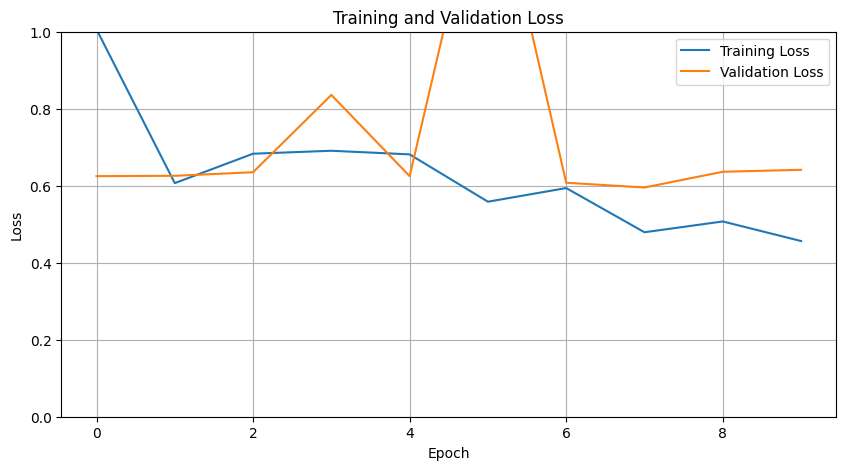

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(history_resnetCnD.history['loss'], label='Training Loss')
plt.plot(history_resnetCnD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

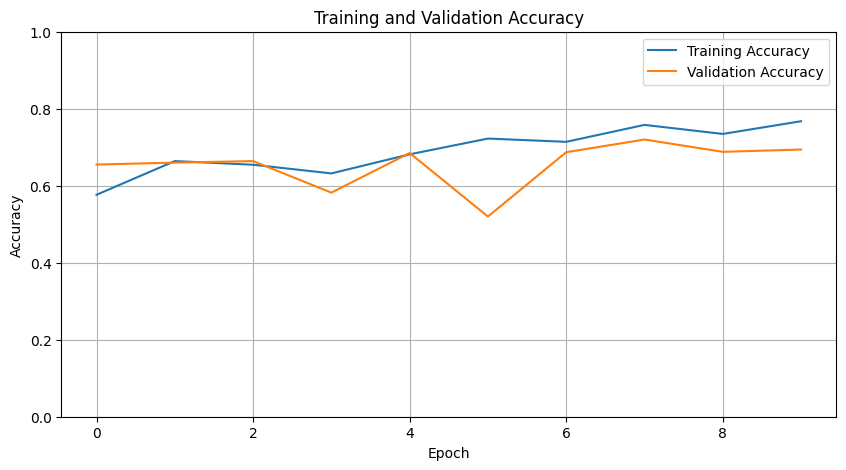

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(history_resnetCnD.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnetCnD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

#### Horse2Zebra

In [66]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False

# Create a Sequential model with custom layers for binary classification
resnetH2Z = tf.keras.Sequential([
    base_model_resnet,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
resnetH2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
resnetH2Z.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_15 (Flatten)        (None, 100352)            0         
                                                                 
 dense_15 (Dense)            (None, 1)                 100353    
                                                                 
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


In [67]:
resnetH2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_resnetH2z = resnetCnD.fit(
    train_generator_vgg_H2Z,
    epochs=10,
    validation_data=validation_generator_vgg_H2Z
)

Epoch 1/10
123/123 [==============================] - 13s 106ms/step - loss: 0.4056 - accuracy: 0.8227 - val_loss: 0.3869 - val_accuracy: 0.8269
Epoch 2/10
123/123 [==============================] - 11s 93ms/step - loss: 0.3159 - accuracy: 0.8667 - val_loss: 0.3781 - val_accuracy: 0.8385
Epoch 3/10
123/123 [==============================] - 11s 92ms/step - loss: 0.3225 - accuracy: 0.8528 - val_loss: 0.3089 - val_accuracy: 0.8731
Epoch 4/10
123/123 [==============================] - 12s 94ms/step - loss: 0.2506 - accuracy: 0.8903 - val_loss: 0.3140 - val_accuracy: 0.8692
Epoch 5/10
123/123 [==============================] - 12s 96ms/step - loss: 0.3192 - accuracy: 0.8642 - val_loss: 0.3110 - val_accuracy: 0.8615
Epoch 6/10
123/123 [==============================] - 12s 95ms/step - loss: 0.2325 - accuracy: 0.8973 - val_loss: 0.5174 - val_accuracy: 0.8192
Epoch 7/10
123/123 [==============================] - 13s 102ms/step - loss: 0.2645 - accuracy: 0.8891 - val_loss: 0.3556 - val_accurac

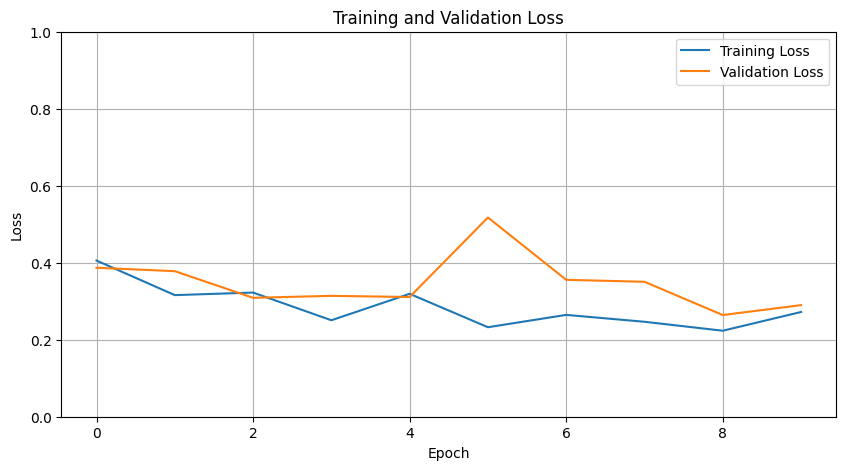

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(history_resnetH2z.history['loss'], label='Training Loss')
plt.plot(history_resnetH2z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

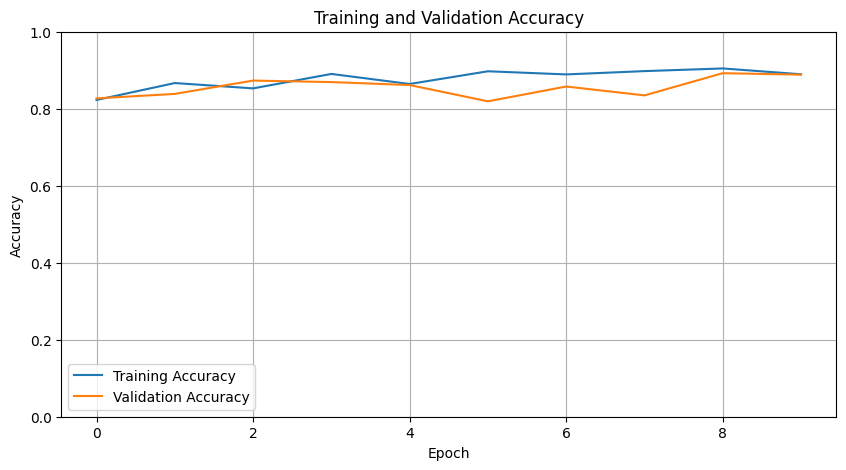

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(history_resnetH2z.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnetH2z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

## EfficientNetB0

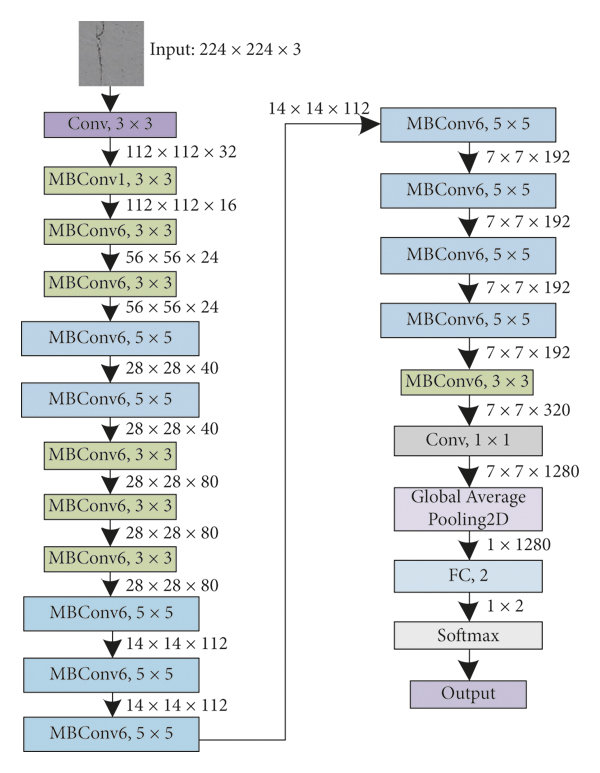

In [75]:
image_path = 'EfficientNetB0.png'
display(Image(filename=image_path))

#### Cats & Dogs

In [70]:
from tensorflow.keras.applications import EfficientNetB0

# Load the EfficientNetB0 model
base_model_efficientnet_CnD = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_efficientnet_CnD.trainable = False

# Create a Sequential model with custom layers for binary classification
efficientnet_CnD = tf.keras.Sequential([
    base_model_efficientnet_CnD,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
efficientnet_CnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
efficientnet_CnD.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_16 (Flatten)        (None, 62720)             0         
                                                                 
 dense_16 (Dense)            (None, 1)                 62721     
                                                                 
Total params: 4,112,292
Trainable params: 62,721
Non-trainable params: 4,049,571
_________________________________________________________________


In [71]:
efficientnet_CnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_efficientnet_CnD = efficientnet_CnD.fit(
    train_generator_vgg_CnD,
    epochs=10,
    validation_data=validation_generator_vgg_CnD
)

Epoch 1/10
100/100 [==============================] - 21s 138ms/step - loss: 1.3336 - accuracy: 0.4910 - val_loss: 1.1292 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 13s 128ms/step - loss: 0.8893 - accuracy: 0.5110 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 12s 116ms/step - loss: 0.7942 - accuracy: 0.4920 - val_loss: 0.7114 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 12s 118ms/step - loss: 0.9033 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.5020
Epoch 5/10
100/100 [==============================] - 11s 114ms/step - loss: 1.0399 - accuracy: 0.4895 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 6/10
100/100 [==============================] - 12s 117ms/step - loss: 0.8935 - accuracy: 0.4995 - val_loss: 0.9203 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 12s 117ms/step - loss: 0.9068 - accuracy: 0.4875 - val_loss: 1.1300 - val_ac

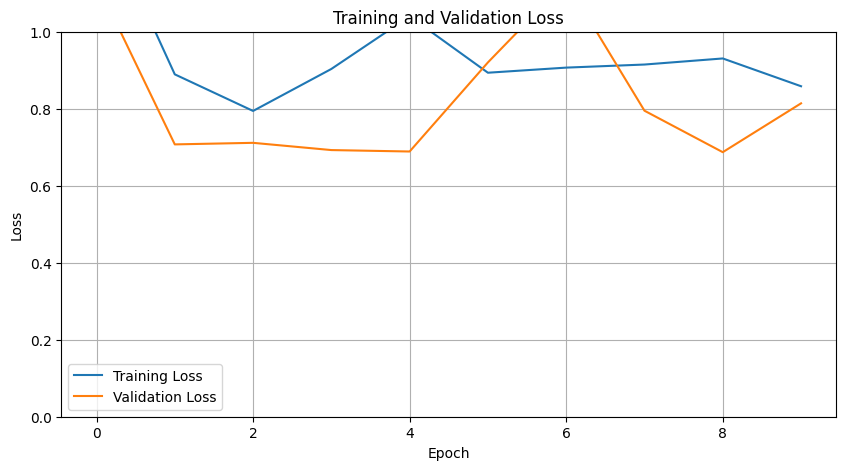

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(history_efficientnet_CnD.history['loss'], label='Training Loss')
plt.plot(history_efficientnet_CnD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

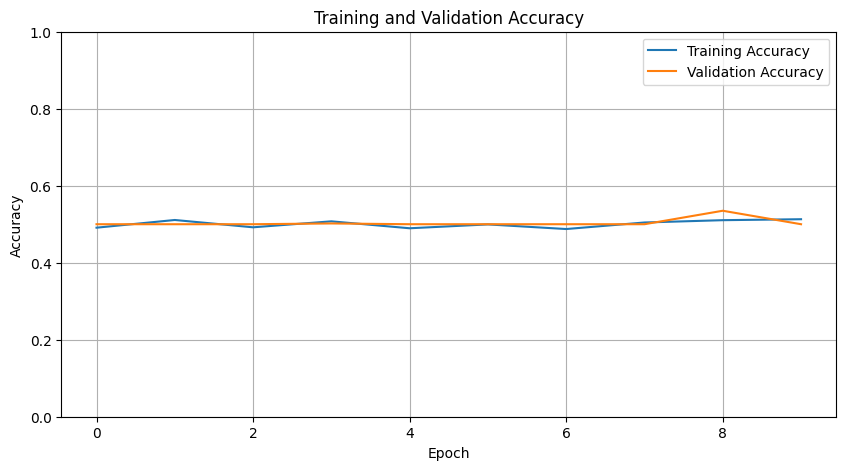

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(history_efficientnet_CnD.history['accuracy'], label='Training Accuracy')
plt.plot(history_efficientnet_CnD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

#### Horse2Zebra

In [74]:
# Load the EfficientNetB0 model
base_model_efficientnet_H2Z = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_efficientnet_H2Z.trainable = False

# Create a Sequential model with custom layers for binary classification
efficientnet_H2Z = tf.keras.Sequential([
    base_model_efficientnet_H2Z,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
efficientnet_H2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
efficientnet_H2Z.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_17 (Flatten)        (None, 62720)             0         
                                                                 
 dense_17 (Dense)            (None, 1)                 62721     
                                                                 
Total params: 4,112,292
Trainable params: 62,721
Non-trainable params: 4,049,571
_________________________________________________________________


In [78]:
efficientnet_H2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_efficientnet_H2Z = efficientnet_H2Z.fit(
    train_generator_vgg_H2Z,
    epochs=10,
    validation_data=validation_generator_vgg_H2Z
)

Epoch 1/10
123/123 [==============================] - 20s 101ms/step - loss: 1.0294 - accuracy: 0.5406 - val_loss: 0.6086 - val_accuracy: 0.5385
Epoch 2/10
123/123 [==============================] - 11s 91ms/step - loss: 0.8112 - accuracy: 0.5911 - val_loss: 1.1852 - val_accuracy: 0.5385
Epoch 3/10
123/123 [==============================] - 11s 88ms/step - loss: 0.7762 - accuracy: 0.5997 - val_loss: 0.5637 - val_accuracy: 0.6923
Epoch 4/10
123/123 [==============================] - 11s 86ms/step - loss: 0.6930 - accuracy: 0.6164 - val_loss: 0.9960 - val_accuracy: 0.5385
Epoch 5/10
123/123 [==============================] - 11s 92ms/step - loss: 0.7084 - accuracy: 0.6143 - val_loss: 0.7141 - val_accuracy: 0.5385
Epoch 6/10
123/123 [==============================] - 11s 92ms/step - loss: 0.7634 - accuracy: 0.6347 - val_loss: 0.5172 - val_accuracy: 0.7192
Epoch 7/10
123/123 [==============================] - 11s 90ms/step - loss: 0.8641 - accuracy: 0.6241 - val_loss: 0.4932 - val_accuracy

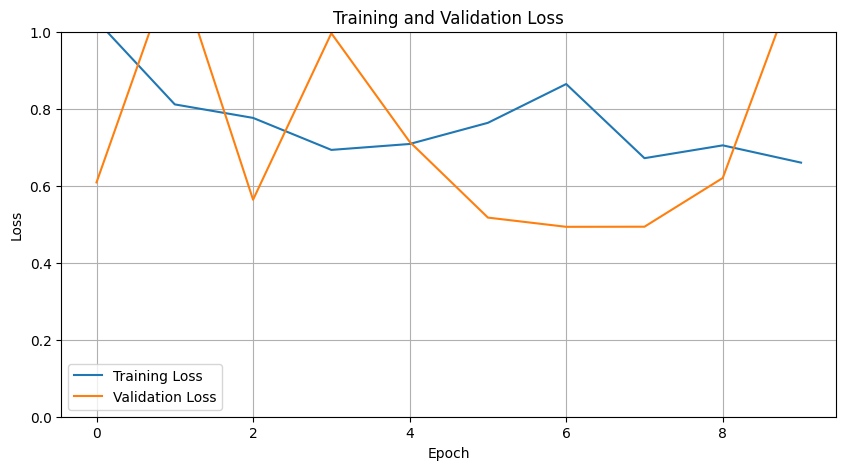

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(history_efficientnet_H2Z.history['loss'], label='Training Loss')
plt.plot(history_efficientnet_H2Z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

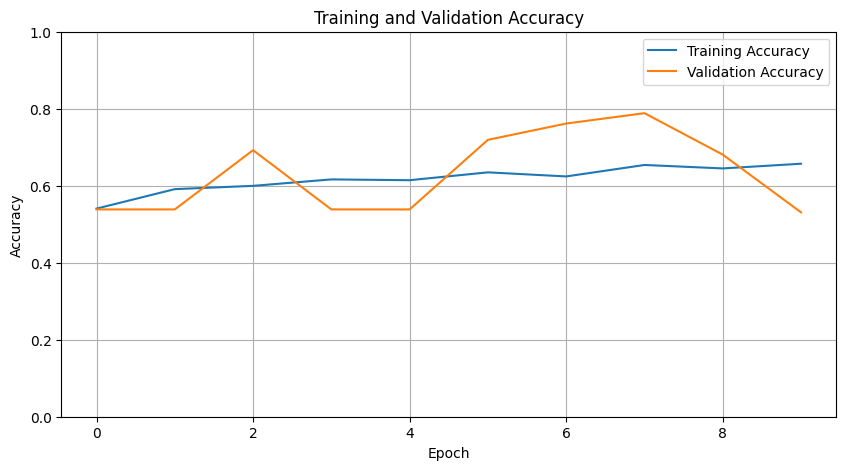

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(history_efficientnet_H2Z.history['accuracy'], label='Training Accuracy')
plt.plot(history_efficientnet_H2Z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

## MobileNetV2

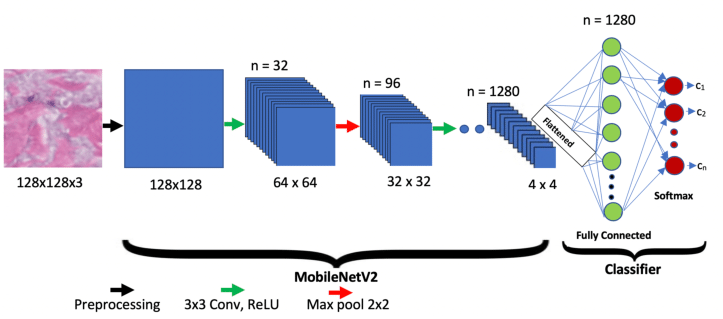

In [76]:
image_path = 'MobileNetV2.png'
display(Image(filename=image_path))

In [85]:
from tensorflow.keras.applications import MobileNetV2

base_model_mobilenet_CnD = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenet_CnD.trainable = False

# Create a Sequential model with custom layers for binary classification
mobilenet_CnD = tf.keras.Sequential([
    base_model_mobilenet_CnD,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
mobilenet_CnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
mobilenet_CnD.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_19 (Flatten)        (None, 62720)             0         
                                                                 
 dense_19 (Dense)            (None, 1)                 62721     
                                                                 
Total params: 2,320,705
Trainable params: 62,721
Non-trainable params: 2,257,984
_________________________________________________________________


In [86]:
mobilenet_CnD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_mobilenet_CnD = mobilenet_CnD.fit(
    train_generator_vgg_CnD,
    epochs=5,
    validation_data=validation_generator_vgg_CnD
)

Epoch 1/5
100/100 [==============================] - 15s 128ms/step - loss: 0.3184 - accuracy: 0.9495 - val_loss: 0.2610 - val_accuracy: 0.9690
Epoch 2/5
100/100 [==============================] - 12s 119ms/step - loss: 0.1529 - accuracy: 0.9835 - val_loss: 0.2228 - val_accuracy: 0.9820
Epoch 3/5
100/100 [==============================] - 13s 126ms/step - loss: 0.0207 - accuracy: 0.9975 - val_loss: 0.2436 - val_accuracy: 0.9790
Epoch 4/5
100/100 [==============================] - 13s 125ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.4429 - val_accuracy: 0.9680
Epoch 5/5
100/100 [==============================] - 12s 119ms/step - loss: 0.0220 - accuracy: 0.9955 - val_loss: 0.2910 - val_accuracy: 0.9780


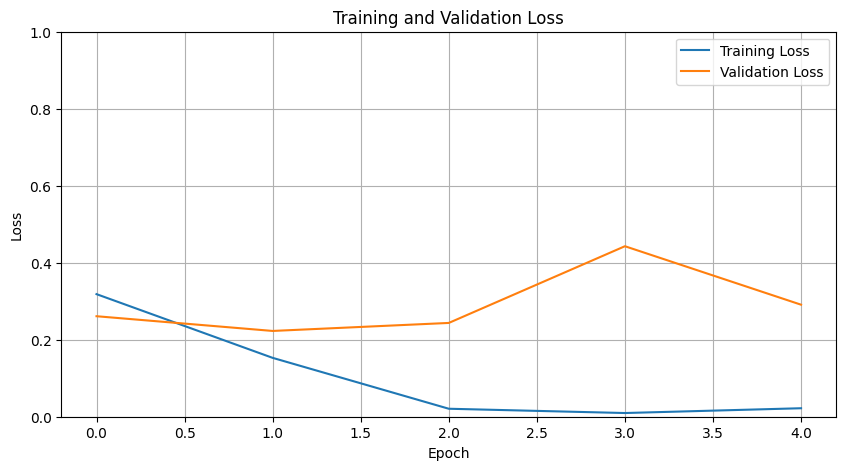

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(history_mobilenet_CnD.history['loss'], label='Training Loss')
plt.plot(history_mobilenet_CnD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

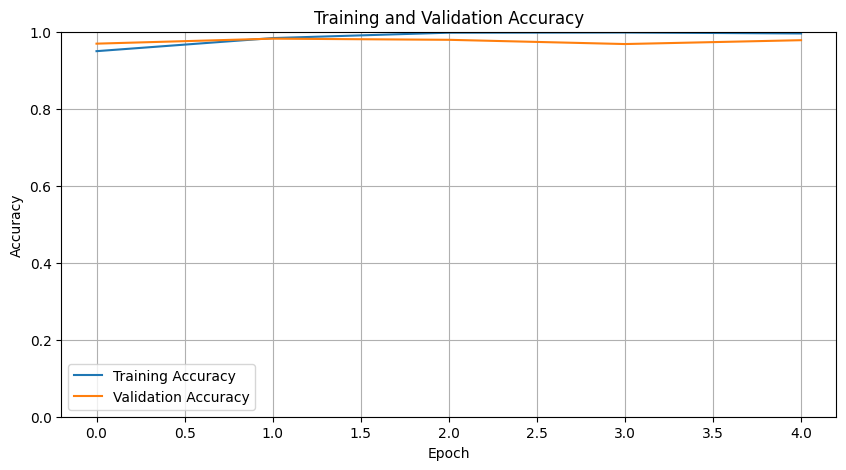

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(history_mobilenet_CnD.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet_CnD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

#### Horse2Zebra

In [91]:
base_model_mobilenet_H2Z = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenet_H2Z.trainable = False

# Create a Sequential model with custom layers for binary classification
mobilenet_H2Z = tf.keras.Sequential([
    base_model_mobilenet_H2Z,
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification with one output neuron and sigmoid activation
])

# Compile the model
mobilenet_H2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
mobilenet_H2Z.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_21 (Flatten)        (None, 62720)             0         
                                                                 
 dense_21 (Dense)            (None, 1)                 62721     
                                                                 
Total params: 2,320,705
Trainable params: 62,721
Non-trainable params: 2,257,984
_________________________________________________________________


In [92]:
mobilenet_H2Z.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_mobilenet_H2Z = mobilenet_H2Z.fit(
    train_generator_vgg_H2Z,
    epochs=2,
    validation_data=validation_generator_vgg_H2Z
)

Epoch 1/2
123/123 [==============================] - 15s 91ms/step - loss: 0.2103 - accuracy: 0.9764 - val_loss: 0.2796 - val_accuracy: 0.9885
Epoch 2/2
123/123 [==============================] - 11s 92ms/step - loss: 0.0470 - accuracy: 0.9951 - val_loss: 0.4193 - val_accuracy: 0.9808


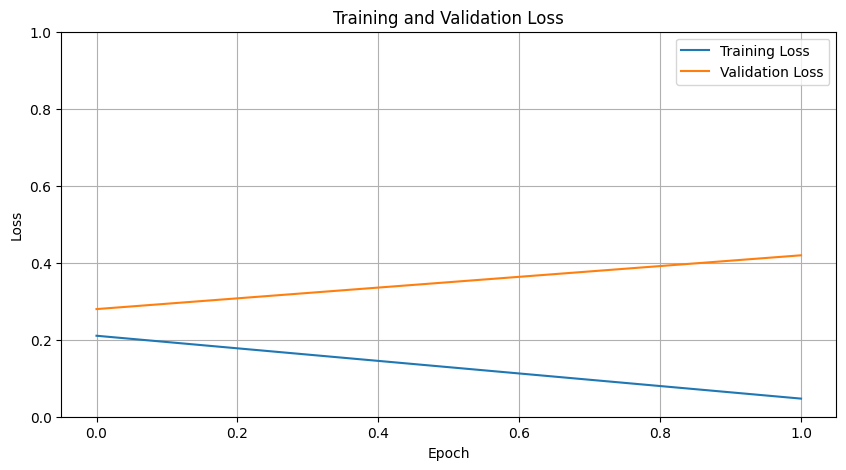

In [93]:

plt.figure(figsize=(10, 5))
plt.plot(history_mobilenet_H2Z.history['loss'], label='Training Loss')
plt.plot(history_mobilenet_H2Z.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()

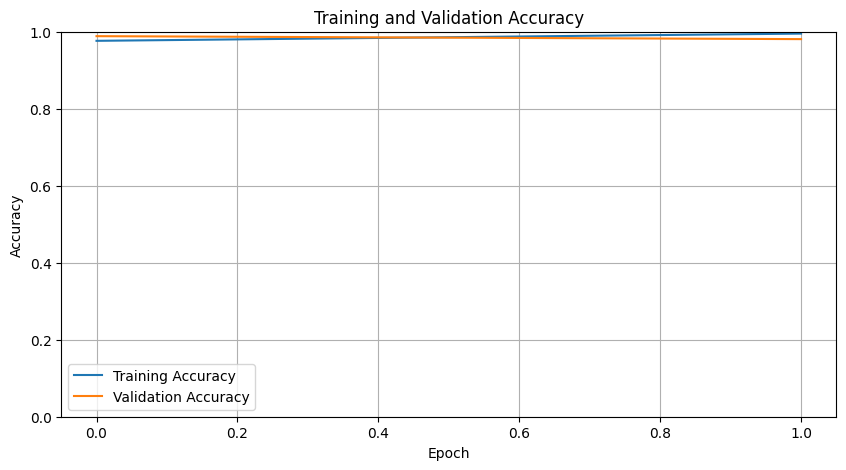

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(history_mobilenet_H2Z.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet_H2Z.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.grid()
plt.show()